<a href="https://colab.research.google.com/github/tur-learning/STAT2103-biz/blob/cinema-troisi/notebooks/3_probability.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Probability

- Events, Sample Spaces, and Probability  
- Unions and Intersections  
- Complementary Events  
- The Additive Rule and Mutually Exclusive Events  
- Conditional Probability  
- The Multiplicative Rule and Independent Events  
- Bayes’s Rule  

### Events, Sample Spaces, and Probability

Probability theory provides a framework for modeling uncertainty in various scenarios. Whether predicting sales outcomes, assessing risks, or analyzing data trends, understanding the fundamental elements—experiments, sample spaces, and events—is essential. These concepts serve as the building blocks for more advanced probability topics, enabling businesses to make data-driven decisions.

###  Definitions

- **Sample Space ($\Omega$):** The set of all possible outcomes of a random experiment.

- **Event ($A$):** A subset of the sample space; a collection of outcomes.

- **Probability Measure ($P$):** A function that assigns a probability to events, satisfying the following axioms:

  1. **Non-negativity:**  
     $$ P(A) \geq 0 \quad \text{for any event } A. $$

  2. **Normalization:**
  The sum of the probabilities on the whole sample space is always equal to one

     $$ P(\Omega) = 1. $$

  3. **Additivity:**  
     For any countable sequence of mutually exclusive events $A_1, A_2, \ldots$,  
     $$ P\left( \bigcup_{i=1}^{\infty} A_i \right) = \sum_{i=1}^{\infty} P(A_i). $$


#### Experiment  
An *experiment* is a process whose outcome is uncertain and repeatable under similar conditions. In a business setting, experiments occur in situations such as customer purchases, marketing campaigns, or sales pitches.

For example, consider a sales team pitches to a client. The experiment is the sales process, and the outcome is either closing the deal (**W**in) or losing it (**L**oss).  



#### Sample Point  


A *sample point* (denoted as $ \omega $) is the most basic outcome of an experiment.  

A single sales deal has two sample points: $ \omega_1 = \text{W} $ (Win) and $ \omega_2 = \text{L} $ (Loss).  

If instead the sales team is pitching to two clients with each pitch having two possible outcomes **Win (W)** or **Loss (L)** the sample points for this scenario are:
$$
\omega_1 = \text{WW}, \, \omega_2 = \text{WL}, \, \omega_3 = \text{LW}, \, \omega_4 = \text{LL}.
$$

Here, $\omega_3 = \text{LW}$ indicates that the first pitch resulted in a loss, and the second was a win.



#### Sample Space  

The *sample space* ($S$) is the set of all possible outcomes of the experiment. It provides a complete picture of what could occur.

- For 1 deal: $ S = \{ \text{W}, \text{L} \} $.  
- For 2 deals: $ S = \{ \text{WW}, \text{WL}, \text{LW}, \text{LL} \} $.  

This concept becomes particularly useful in scenarios where businesses need to estimate the likelihood of different outcomes, such as achieving a sales target or exceeding revenue expectations.



#### Events and Their Probabilities  
An *event* is a subset of the sample space, representing specific outcomes of interest. Events can be simple, involving one outcome, or compound, encompassing multiple outcomes.

For example, the event "winning at least one pitch" in a two-pitch scenario includes three outcomes:

$$
A = \{ \text{WW}, \text{WL}, \text{LW} \}.
$$


### Probability in Sales Scenarios with Low Conversion Rates

Consider a sales team with a **1% conversion rate** per client interaction (each "click" or pitch). Each interaction has two outcomes: **Win (W)** with probability $ p = 0.01 $ or **Loss (L)** with $ p = 0.99 $. For $ N $ interactions, the sample space $ \Omega $ includes all sequences of W/L (e.g., WWL, LWL), but outcomes are **not equally likely**.


### Classical vs. Non-Equally Likely Probabilities

- **Classical Probability (Equally Likely Outcomes):**  
  
  Let's pretend that all outcomes are equally likely (e.g., fair coin flips), the probability of an event $ A $ is:  

  $$
  P(A) = \frac{\text{Number of favorable outcomes}}{\text{Total outcomes}}.
  $$  


  For $ N = 2 $
  $$ \Omega = \{\text{WW}, \text{WL}, \text{LW}, \text{LL}\} $$,  
  $$ P(\text{exactly one win}) = \frac{2}{4} = 0.5 $$


- **Non-Equally Likely Outcomes:**  

  We know that in sales, outcomes are **not equally likely**.
  
  For $ N = 2 $:  

  - $ P(\text{WW}) = (0.01)^2 = 0.0001 $,  
  - $ P(\text{WL}) = P(\text{LW}) = 0.01 \cdot 0.99 = 0.0099 $,  
  - $ P(\text{LL}) = (0.99)^2 = 0.9801 $.  

  The event "exactly one win" has probability $ 0.0099 + 0.0099 = 0.0198 $.


### Frequentist Probability: Law of Large Numbers  

The frequentist approach defines probability as the **long-run frequency** of an event. For example, the conversion rate $ p = 0.01 $ means:  

$$
P(\text{W}) = \lim_{n \to \infty} \frac{\text{Number of wins in } n \text{ trials}}{n}.
$$

**Python Simulation:**  
Simulate 10,000 client interactions to demonstrate convergence to $ p = 0.01 $:



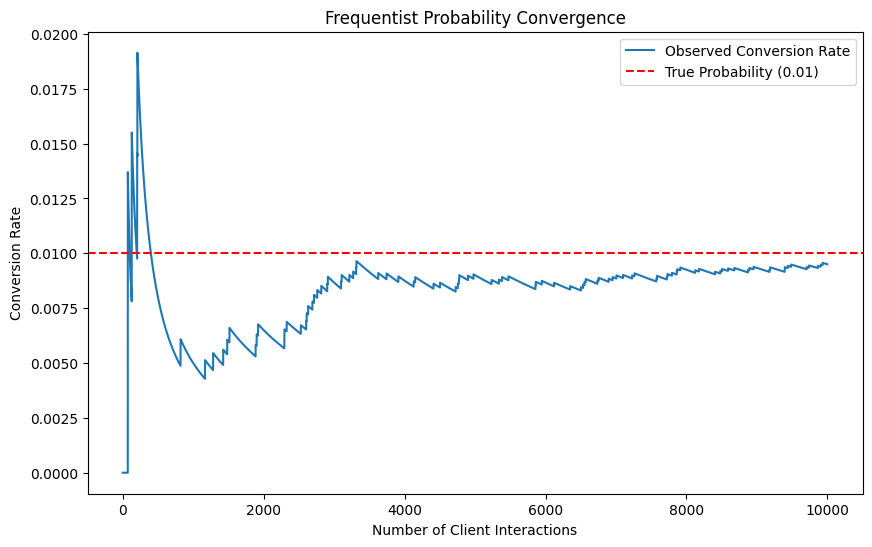

In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
p = 0.01
n_trials = 10000

# Simulate clicks: 1=Win, 0=Loss
clicks = np.random.choice([1, 0], size=n_trials, p=[p, 1-p])

# Calculate cumulative conversion rate
cumulative_wins = np.cumsum(clicks)
cumulative_rate = cumulative_wins / (np.arange(n_trials) + 1)

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(cumulative_rate, label='Observed Conversion Rate')
plt.axhline(p, color='red', linestyle='--', label='True Probability (0.01)')
plt.xlabel('Number of Client Interactions')
plt.ylabel('Conversion Rate')
plt.title('Frequentist Probability Convergence')
plt.legend()
plt.show()


**Output:**  
The observed conversion rate (blue line) fluctuates initially but converges to the true probability $ p = 0.01 $ (red dashed line) as interactions increase.  

#### Bayesian Probability: Dynamic Beliefs  
Bayesian probability treats probability as a **degree of belief** that updates as new data arrives. Unlike the frequentist approach (which requires infinite trials in the same setup), Bayesian methods:  
1. Start with a **prior belief** (e.g., "We think the conversion rate is ~0.01").  
2. Update beliefs using observed data (e.g., "After 5 wins in 500 clicks, the posterior probability shifts").  

**Example:**  
If the sales team improves their pitch, Bayesian methods allow dynamically updating $ P(\text{W}) $ without waiting for infinite trials or without assuming it should be constant.

---

#### Comparison of Approaches  
| **Aspect**               | **Frequentist**                          | **Bayesian**                          |
|--------------------------|------------------------------------------|----------------------------------------|
| **Definition**           | Long-run frequency                       | Subjective belief + data               |
| **Data Requirement**      | Large, static datasets                   | Works with small/sequential data       |
| **Use Case**             | Stable environments (e.g., fixed rates) | Dynamic environments (e.g., A/B tests) |

---

### Summary  
- **Classical probability** applies only to equally likely outcomes.  
- **Frequentist probability** uses long-run frequencies, validated by simulations.  
- **Bayesian probability** updates beliefs dynamically, ideal for evolving business contexts.


### Unions and Intersections: Combining Events in Business Contexts  

Understanding how events interact is critical for modeling complex scenarios, such as overlapping marketing campaigns, sales pipelines, or risk assessments. **Unions** and **intersections** formalize the logic of "either/or" and "both" outcomes, enabling precise probability calculations. Let’s explore these concepts in depth, with a focus on real-world business applications.


### Definitions and Intuition  

#### **Union of Events ($A \cup B$)**  
The union represents **at least one** of the events $A$ or $B$ occurring. For example:  
- *Business Scenario*: A sales team pitching to two clients. The event "winning at least one client" is the union of winning Client 1 **or** Client 2.  

#### **Intersection of Events ($A \cap B$)**  

The intersection represents **both** events $A$ **and** $B$ occurring simultaneously. For example:  
- *Business Scenario*: A customer purchases a product  **both** online **and** in-store during a promotional campaign.

#### **Key Insight: Why Intersections Are Rare**

When events are independent, the probability of their intersection is the **product** of their individual probabilities:  

$$
P(A \cap B) = P(A) \cdot P(B).
$$  

Since probabilities are values between 0 and 1, multiplying them results in a **smaller probability**. This explains why overlapping successes (e.g., closing two low-probability deals) are far less likely than individual successes.  

**Practical Guide: Identifying Independent Events**  

Two events are **independent** if the occurrence (or non-occurrence) of one event **does not influence** the likelihood of the other. Here’s how to determine independence in practice:  

1. **No Causal Relationship:**  
   - Example: Closing a deal with Client A does not affect Client B’s decision.  
   - *Why?* The clients operate in separate markets with no shared dependencies.  

2. **No Shared Influencing Factors:**  
   - Example: Conversions from two marketing campaigns targeting distinct audiences.  
   - *Why?* The campaigns don’t overlap in channels, demographics, or timing.  

3. **Statistical Confirmation:**  
   - Calculate whether $ P(A \cap B) = P(A) \cdot P(B) $.  
   - If the observed frequency of both events aligns with the product of their individual probabilities, they’re independent.  

### The Inclusion-Exclusion Principle  

The probability of a union accounts for overlaps to avoid double-counting:  

$$
P(A \cup B) = P(A) + P(B) - P(A \cap B).
$$  


Imagine calculating the probability of winning **either** Client 1 **or** Client 2. If we naively add $P(A)$ and $P(B)$, we count the overlapping case (winning both clients) twice. Subtracting $P(A \cap B)$ corrects this error.  


### Business Applications  

#### **Sales Team Pitching to Two Clients**  

Suppose each client has a **1% conversion rate** ($p = 0.01$), and outcomes are independent.  
- **$A$**: Win Client 1.  
- **$B$**: Win Client 2.  
- **$A \cap B$**: Win both clients.  

**Calculations:**  
1. $P(A) = P(B) = 0.01$  
2. $P(A \cap B) = 0.01 \times 0.01 = 0.0001$  
3. **Union**:  
   $$
   P(A \cup B) = 0.01 + 0.01 - 0.0001 = 0.0199.
   $$  

**Interpretation:**  
- The chance of closing **at least one deal** is **1.99%**.  
- The intersection term ($0.0001$) is negligible here due to the low conversion rate, but it becomes significant in high-volume scenarios (e.g., 1,000 pitches).  


  
#### **Multi-Channel Ad Campaigns**  

A company runs two digital advertising campaigns for a new product:  
- **Campaign A (YouTube Ads):** 5% of customers convert after seeing the YouTube ad ($P(A) = 0.05$).  
- **Campaign B (Facebook Ads):** 3% of customers convert after seeing the Facebook ad ($P(B) = 0.03$).  
- **Overlap:** 0.5% of customers convert after seeing **both** ads ($P(A \cap B) = 0.005$).  

**Question:**  
What is the probability a customer converts after seeing *at least one* of the ads?  

**Solution:**  
Using the inclusion-exclusion principle:  
$$
P(A \cup B) = P(A) + P(B) - P(A \cap B) = 0.05 + 0.03 - 0.005 = 0.075 \, \text{(7.5%)}.
$$  



**Why This Example Works**  

1. **Clear Overlap Mechanism:**  
   Some customers see **both ads** (e.g., YouTube and Facebook) and convert. These customers are counted in *both* $P(A)$ and $P(B)$, creating an overlap that must be subtracted.  

2. **Real-World Relevance:**  
   Multi-channel marketing is common, and customers often encounter multiple touchpoints before converting.  

3. **Impact of Ignoring Overlap:**  
   If the overlap is ignored, the company would falsely assume an **8% conversion rate** ($0.05 + 0.03$), overestimating performance by **0.5%**.  


**Practical Insight**

- **Why Subtracting Overlap Matters:**  
  Imagine 1,000 customers:  
  - 50 convert via YouTube.  
  - 30 convert via Facebook.  
  - 5 convert after seeing **both**.  

  Total unique converters = $50 + 30 - 5 = 75$ (7.5% conversion rate), *not* 80.  

- **Business Implication:**  
  Accurate overlap calculation prevents budget misallocation. For example, the company might wrongly assume Facebook ads drive 30 conversions, but 5 of those are shared with YouTube.  


**Key Takeaway**  
When events can co-occur (e.g., customers seeing multiple ads), always account for overlaps. This ensures accurate performance metrics and avoids costly decision-making errors.  

#### Python Simulation  

To confirm the union probability for two sales pitches ($P(A \cup B) = 0.0199$), we simulate 1 million trials:  


In [3]:
import numpy as np

np.random.seed(44)
p = 0.01
n_simulations = 1000000

# Simulate two independent pitches (1=Win, 0=Loss)
pitch1 = np.random.choice([1, 0], size=n_simulations, p=[p, 1-p])
pitch2 = np.random.choice([1, 0], size=n_simulations, p=[p, 1-p])

# Calculate union: At least one win
union = np.sum((pitch1 == 1) | (pitch2 == 1)) / n_simulations

# Theoretical value
theory = 2*p - p**2

print(f"Simulated P(A ∪ B): {union:.4f}")
print(f"Theoretical P(A ∪ B): {theory:.4f}")

Simulated P(A ∪ B): 0.0199
Theoretical P(A ∪ B): 0.0199



**Key Takeaway:**  
The simulation aligns perfectly with theory, even for rare events. This validates the inclusion-exclusion principle in practice.  

### Complementary Events: The Power of "Not"  

The complement of an event provides a powerful way to analyze scenarios by focusing on what *doesn’t* happen, often simplifying complex probability calculations.  

**Definition and Formula**  
The **complement** of an event $A$, denoted $A'$ or $\neg A$, represents the event that $A$ **does not occur**. Its probability is:  
$$ P(A') = 1 - P(A) $$  

**Business Example**  
- *Scenario*: A startup has a 20% chance of securing venture capital funding ($P(A) = 0.2$).  
- *Complement*: The probability of **not securing funding** is $P(A') = 1 - 0.2 = 0.8$.  

#### **Strategic Use of Complements**  
Complements simplify calculating the likelihood of **at least one success** across multiple events. Instead of computing unions directly, use:  
$$ P(\text{At least one success}) = 1 - P(\text{All failures}) $$  

**Application to Sales Pitches**  
Revisiting the sales team example with two clients (1% conversion rate each):  
- Probability of losing both clients:  
  $$ P(A' \cap B') = (1 - 0.01)^2 = 0.9801 $$  
- Probability of winning **at least one client**:  
  $$ 1 - 0.9801 = 0.0199 $$  
This matches the union result ($P(A \cup B) = 0.0199$), validating the complementary approach.  

#### **Business Implication**  
1. **Risk Assessment**:  
   - Complements quantify worst-case scenarios (e.g., *all* marketing campaigns failing).  

**Example: Product Launch Failure Risk**  
A company launches 5 independent marketing campaigns, each with a 10% success probability:  
- Probability **all campaigns fail**:  
  $$ (1 - 0.10)^5 \approx 0.5905 $$  
- Probability **at least one succeeds**:  
  $$ 1 - 0.5905 = 0.4095 $$  

A 59% risk of total failure.




### Mutual Exclusivity: When Overlaps Are Impossible  

Two events are **mutually exclusive** if they cannot occur together ($P(A \cap B) = 0$). For example:  
- **$A$**: Closing a deal on Monday.  
- **$B$**: Closing the **same** deal on Tuesday.  

Here, the union simplifies to:  
$$
P(A \cup B) = P(A) + P(B)
$$  

**Business Implication:**  
Mutually exclusive events are common in scheduling or resource allocation (e.g., hiring one candidate for a role).  


### Critical Observations for Business Strategy  

1. **Low-Probability Intersections:**  
   Simultaneous successes (e.g., closing two deals) become exponentially unlikely as events scale:  

$$ P(\text{All Wins}) = (0.01)^N $$

   - This explain why hitting 100% targets in low-conversion environments is nearly impossible.  

2. **Risk of Overcounting:**  
   - When calculating probabilities for unions (e.g., "at least one sale"), always subtract overlaps. Forgetting this leads to over-optimistic forecasts.  

3. **Sequential vs. Independent Events:**  
   - If events are dependent (e.g., closing Client 2 depends on Client 1’s outcome), the intersection probability changes. This requires **conditional probability** (covered next).  



### **Conditional Probability: Modeling Network Effects in Client Conversions**

---

#### **Definition**


**Conditional Probability** quantifies the likelihood of an event occurring **given** that another event has already occurred.

**Definition**:  
The probability of event $ A $ occurring **given** that event $ B $ has occurred is:  

$$
P(A \mid B) = \frac{P(A \cap B)}{P(B)}, \quad \text{provided } P(B) > 0.
$$


In business, this is critical for modeling dependencies, such as network effects where early successes enhance future outcomes.  

**Example Scenario**:  
A sales team targets **100 clients** in a networked industry (e.g., SaaS products where client adoption influences others).  
- **Base conversion rate**: 1% per client ($P(\text{Win}) = 0.01$).  
- **Network effect**: Each prior win **doubles** the conversion rate for subsequent clients.  
  - After 1 win: $P(\text{Win} \mid \text{1 prior win}) = 0.02$.  
  - After 2 wins: $P(\text{Win} \mid \text{2 prior wins}) = 0.04$, and so on.  

---

#### **Mathematical Framework for 4 Clients**

For simplicity, first consider **4 clients** ($A, B, C, D$). The probability of winning all four clients, leveraging network effects:  
$$
P(A \cap B \cap C \cap D) = P(A) \cdot P(B \mid A) \cdot P(C \mid A \cap B) \cdot P(D \mid A \cap B \cap C)
$$  
With doubling conversion rates:  
$$
= 0.01 \times 0.02 \times 0.04 \times 0.08 = 0.00000064
$$  
**Interpretation**:  
- The probability of closing all 4 deals is **0.000064%**—extremely low, but **256x higher** than independent outcomes ($0.01^4 = 0.00000001$).  




### **Bayes’ Theorem: Updating Conversion Rate Beliefs**  

Bayes’ Theorem helps refine probability estimates when new evidence becomes available. It’s a powerful tool to transition from initial guesses to data-driven conclusions.


## **Core Concepts**
1. **Prior Probability ($P(A)$)**  
   Represents the initial belief about a hypothesis before observing any data.  

2. **Likelihood ($P(B \mid A)$)**  
   The probability of observing the data, assuming the hypothesis is true.

3. **Marginal Likelihood ($P(B)$)**  
   The overall probability of observing the data, considering all hypotheses.

4. **Posterior Probability ($P(A \mid B)$)**  
   The updated belief about a hypothesis after observing the data.

---

## **Testing a Landing Page**

### Scenario
A company is testing whether a new landing page has a **10% conversion rate (Hypothesis A)** or a **30% conversion rate (Hypothesis B)**. Initially, they have equal confidence in both hypotheses. After a single visitor converts, how should the company update its beliefs?  

1. **Hypotheses**  
   - $A$: Conversion rate = 10% ($0.1$)  
   - $B$: Conversion rate = 30% ($0.3$)  

2. **Prior Beliefs**  
   $$
   P(A) = P(B) = 0.5 \quad \text{(equal confidence in both)}
   $$

3. **Observed Data**  
   The first visitor **converts**.

4. **Likelihoods**  
   - $P(\text{Data} \mid A) = 0.1$ (10% chance of conversion under $A$)  
   - $P(\text{Data} \mid B) = 0.3$ (30% chance of conversion under $B$)

5. **Marginal Likelihood**  
   $$
   P(\text{Data}) = P(\text{Data} \mid A)P(A) + P(\text{Data} \mid B)P(B)
   $$  
   $$
   P(\text{Data}) = (0.1 \times 0.5) + (0.3 \times 0.5) = 0.2
   $$

6. **Posterior Probabilities**  
   Using Bayes’ Theorem:  
   $$
   P(A \mid \text{Data}) = \frac{P(\text{Data} \mid A)P(A)}{P(\text{Data})}
   $$  
   $$
   P(A \mid \text{Data}) = \frac{0.1 \times 0.5}{0.2} = 0.25 \quad (25\%)
   $$  
   Similarly:  
   $$
   P(B \mid \text{Data}) = \frac{0.3 \times 0.5}{0.2} = 0.75 \quad (75\%)
   $$

**Interpretation**  
After one conversion, the hypothesis that the conversion rate is 30% becomes more likely (75%) compared to the 10% hypothesis (25%).




In [7]:
# Bayes' Theorem for Landing Page Conversion Test

# Hypotheses and Priors
P_A = 0.5  # Prior probability for Hypothesis A (10% conversion)
P_B = 0.5  # Prior probability for Hypothesis B (30% conversion)

# Likelihoods (probability of observing 1 conversion under each hypothesis)
likelihood_A = 0.1  # P(Data | A)
likelihood_B = 0.3  # P(Data | B)

# Marginal Likelihood (total probability of observing the data)
marginal = (likelihood_A * P_A) + (likelihood_B * P_B)

# Posterior Probabilities
posterior_A = (likelihood_A * P_A) / marginal
posterior_B = (likelihood_B * P_B) / marginal

# Results
print(f"Posterior probability of Hypothesis A (10% conversion): {posterior_A:.2f} or {posterior_A*100:.1f}%")
print(f"Posterior probability of Hypothesis B (30% conversion): {posterior_B:.2f} or {posterior_B*100:.1f}%")

Posterior probability of Hypothesis A (10% conversion): 0.25 or 25.0%
Posterior probability of Hypothesis B (30% conversion): 0.75 or 75.0%



## **The Binomial Coefficient and Factorials**

For more complex scenarios with multiple trials (e.g., 10 visitors, 2 conversions), the likelihood is calculated using the **binomial coefficient**. This determines how many ways a given number of successes ($k$) can occur in a set number of trials ($n$).  

### Binomial Coefficient Formula
$$
\binom{n}{k} = \frac{n!}{k!(n-k)!}
$$  
- $n!$: The factorial of $n$, calculated as $n \times (n-1) \times \dots \times 1$.  
  For example, $5! = 5 \times 4 \times 3 \times 2 \times 1 = 120$.  
- $k!$: The factorial of $k$.  

### Example
If 10 visitors come to a landing page, and we observe 2 conversions:  
$$
\binom{10}{2} = \frac{10!}{2!(10-2)!} = \frac{10 \times 9}{2 \times 1} = 45
$$  
There are 45 ways to arrange 2 conversions among 10 visitors.


## **Email Campaign Testing (Optional)**

### Scenario
An email campaign is tested to evaluate two hypotheses:  
- $C$: Conversion rate = 5% ($0.05$)  
- $D$: Conversion rate = 15% ($0.15$)  

Initial beliefs are $P(C) = 0.4$ and $P(D) = 0.6$. The email is sent to **10 people**, and **2 conversions** are observed.  


1. **Likelihoods Using Binomial Formula**  
   The likelihood of observing $k$ successes in $n$ trials is:  
   $$
   P(\text{Data} \mid \theta) = \binom{n}{k} \theta^k (1-\theta)^{n-k}
   $$  
   For $C$ ($\theta = 0.05$):  
   $$
   P(\text{Data} \mid C) = \binom{10}{2}(0.05)^2(0.95)^8
   $$  
   For $D$ ($\theta = 0.15$):  
   $$
   P(\text{Data} \mid D) = \binom{10}{2}(0.15)^2(0.85)^8
   $$

2. **Marginal Likelihood**  
   Combine likelihoods with prior probabilities:  
   $$
   P(\text{Data}) = P(\text{Data} \mid C)P(C) + P(\text{Data} \mid D)P(D)
   $$

3. **Posterior Probabilities**  
   Update beliefs:  
   $$
   P(C \mid \text{Data}) = \frac{P(\text{Data} \mid C)P(C)}{P(\text{Data})}
   $$  
   $$
   P(D \mid \text{Data}) = \frac{P(\text{Data} \mid D)P(D)}{P(\text{Data})}
   $$

Numerical calculations will reveal the updated probabilities, reflecting which conversion rate is more likely.

Bayesian analysis adapts dynamically to new data, improving decision-making:  
1. **Reduces Uncertainty**: Incorporates observed results to refine estimates.  
2. **Optimizes Resources**: Allocates attention and investment to the most promising options.  
3. **Scales with Complexity**: Works for small tests and large data sets alike.  §